In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Root Finding and Optimization

**GOAL:** Find where $f(x) = 0$.

### Example:  Future Time Annuity

When can I retire?

$$ A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] $$

$P$ is payment amount per compounding period

$m$ number of compounding periods per year

$r$ annual interest rate

$n$ number of years to retirement

$A$ total value after $n$ years

If I want to retire in 20 years what does $r$ need to be?

Set $P = \frac{\$18,000}{12} = \$1500, ~~~~ m=12, ~~~~ n=20$.

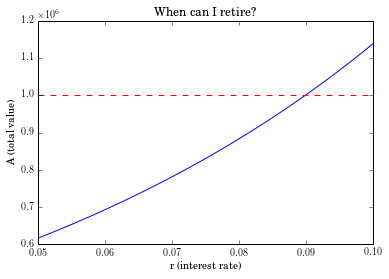

In [2]:
def total_value(P, m, r, n):
    """Total value of portfolio given parameters
    
    Based on following formula:
    
    A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n}
                - 1 \right ] 
    
    :Input:
     - *P* (float) - Payment amount per compounding period
     - *m* (int) - number of compounding periods per year
     - *r* (float) - annual interest rate
     - *n* (float) - number of years to retirement
     
     :Returns:
     (float) - total value of portfolio
     
    """
    
    return P / (r / float(m)) * ( (1.0 + r / float(m))**(float(m) * n)
                                 - 1.0)

P = 1500.0
m = 12
n = 20.0
    
r = numpy.linspace(0.05, 0.1, 100)
goal = 1e6

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, total_value(P, m, r, n))
axes.plot(r, numpy.ones(r.shape) * goal, 'r--')
axes.set_xlabel("r (interest rate)")
axes.set_ylabel("A (total value)")
axes.set_title("When can I retire?")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.show()

## Fixed Point Iteration

How do we go about solving this?

Could try to solve at least partially for $r$:

$$ A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] ~~~~ \Rightarrow ~~~~~$$

$$ r = \frac{P \cdot m}{A} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] ~~~~ \Rightarrow ~~~~~$$

$$ r = g(r)$$
or 
$$ g(r) - r = 0$$

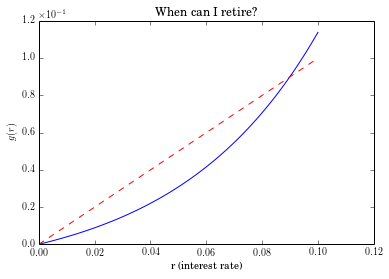

In [3]:
def g(P, m, r, n, A):
    """Reformulated minimization problem
    
    Based on following formula:
    
    g(r) = \frac{P \cdot m}{A} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ]
    
    :Input:
     - *P* (float) - Payment amount per compounding period
     - *m* (int) - number of compounding periods per year
     - *r* (float) - annual interest rate
     - *n* (float) - number of years to retirement
     - *A* (float) - total value after $n$ years
     
     :Returns:
     (float) - value of g(r)
     
    """
    
    return P * m / A * ( (1.0 + r / float(m))**(float(m) * n)
                                 - 1.0)

P = 1500.0
m = 12
n = 20.0
    
r = numpy.linspace(0.00, 0.1, 100)
goal = 1e6

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, g(P, m, r, n, goal))
axes.plot(r, r, 'r--')
axes.set_xlabel("r (interest rate)")
axes.set_ylabel("$g(r)$")
axes.set_title("When can I retire?")
axes.set_ylim([0, 0.12])
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.show()

Guess at $r_0$ and check to see what direction we need to go...

1. $r_0 = 0.0800$, $g(r_0) - r_0 = -0.009317550125425428$
1. $r_1 = 0.0850$, $g(r_1) - r_1 = -0.00505763375972$
1. $r_2 = 0.0875$, $g(r_2) - r_2 = -0.00257275331014$

A bit tedious, we can also make this algorithmic:


In [4]:
r = 0.09
for steps in xrange(10):
    print "r = ", r
    print "Residual = ", g(P, m, r, n, goal) - r
    r = g(P, m, r, n, goal)
    print

r =  0.09
Residual =  0.000164727440507

r =  0.0901647274405
Residual =  0.000354277734037

r =  0.0905190051745
Residual =  0.000765861661241

r =  0.0912848668358
Residual =  0.00167404901814

r =  0.0929589158539
Residual =  0.00374864222552

r =  0.0967075580794
Residual =  0.00885788434491

r =  0.105565442424
Residual =  0.0237311213235

r =  0.129296563748
Residual =  0.088382496983

r =  0.217679060731
Residual =  1.11038120422

r =  1.32806026495
Residual =  1569787711.36



### Example 2:

Let $f(x) = x - e^{-x}$, solve $f(x) = 0$

Equivalent to $x = e^{-x}$ or $x = g(x)$ where $g(x) = e^{-x}$

Note that this problem is equivalent to $x = -\ln x$.

x =  0.4
Residual =  0.270320046036

x =  0.670320046036
Residual =  -0.158775212347

x =  0.511544833689
Residual =  0.0880237954988

x =  0.599568629188
Residual =  -0.0505202007037

x =  0.549048428484
Residual =  0.0284506521954

x =  0.57749908068
Residual =  -0.0161987010418

x =  0.561300379638
Residual =  0.00916637831975



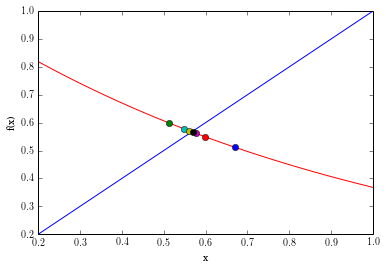

In [5]:
x = numpy.linspace(0.2, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.exp(-x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")

x = 0.4
for steps in xrange(7):
    print "x = ", x
    print "Residual = ", numpy.exp(-x) - x
    x = numpy.exp(-x)
    print
    axes.plot(x, numpy.exp(-x),'o',)

plt.show()

### Example 3:

Let $f(x) = \ln x + x$ and solve $f(x) = 0$ or $x = -\ln x$.

x =  0.5
Residual =  -0.19314718056

x =  0.69314718056
Residual =  0.326634259978

x =  0.366512920582
Residual =  -0.637208583721



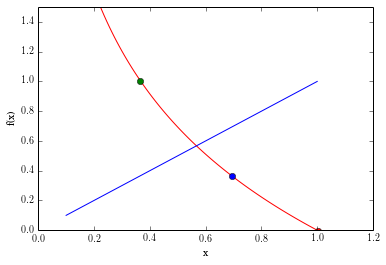

In [6]:
x = numpy.linspace(0.1, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.log(x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_ylim([0.0, 1.5])

x = 0.5
for steps in xrange(3):
    print "x = ", x
    print "Residual = ", numpy.log(x) + x
    x = -numpy.log(x)
    print
    axes.plot(x, -numpy.log(x),'o',)

plt.show()

These are equivalent problems!  Something is awry...

## Analysis of Fixed Point Iteration

*Theorem*: Existence and uniqueness of fixed point problems

Assume $g \in C[a, b]$, if the range of the mapping $y = g(x)$ satisfies $y \in [a, b]~~~ \forall~~~ x \in [a, b]$ then $g$ has a fixed point in $[a, b]$.

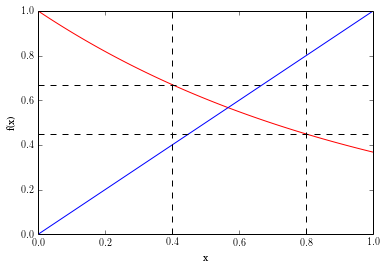

In [7]:
x = numpy.linspace(0.0, 1.0, 100)

# Plot function and intercept
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.exp(-x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")

# Plot domain and range
axes.plot(numpy.ones(x.shape) * 0.4, x, '--k')
axes.plot(numpy.ones(x.shape) * 0.8, x, '--k')
axes.plot(x, numpy.ones(x.shape) * numpy.exp(-0.4), '--k')
axes.plot(x, numpy.ones(x.shape) * numpy.exp(-0.8), '--k')

axes.set_xlim((0.0, 1.0))
axes.set_ylim((0.0, 1.0))

plt.show()

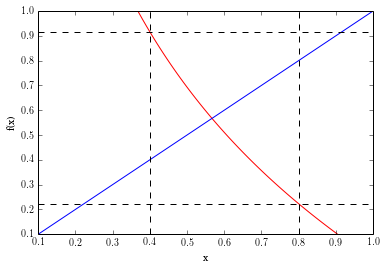

In [8]:
x = numpy.linspace(0.1, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.log(x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_xlim([0.1, 1.0])
axes.set_ylim([0.1, 1.0])

# Plot domain and range
axes.plot(numpy.ones(x.shape) * 0.4, x, '--k')
axes.plot(numpy.ones(x.shape) * 0.8, x, '--k')
axes.plot(x, numpy.ones(x.shape) * -numpy.log(0.4), '--k')
axes.plot(x, numpy.ones(x.shape) * -numpy.log(0.8), '--k')

plt.show()

Additionally, suppose $g'(x)$ is defined for $x \in [a,b]$ and $\exists K < 1$ s.t. $|g'(x)| \leq K < 1 ~~~ \forall ~~~ x \in (a,b)$, then $g$ has a unique fixed point $P \in [a,b]$

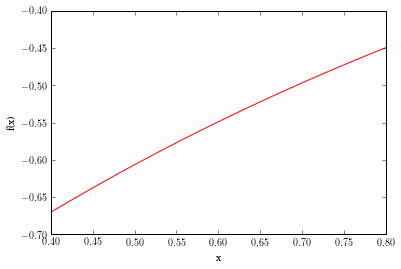

In [9]:
x = numpy.linspace(0.4, 0.8, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.exp(-x), 'r')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
plt.show()

*Theorem 2*: Asymptotic convergence behavior of fixed point iterations

$$x_{k+1} = g(x_k)$$

Assume that $\exists ~ x^*$ s.t. $x^* = g(x^*)$

$$x_k = x^* + e_k ~~~~~~~~~~~~~~ x_{k+1} = x^* + e_{k+1}$$

$$x^* + e_{k+1} = g(x^* + e_k)$$

Using a Taylor expansion we know

$$g(x^* + e_k) = g(x^*) + g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2}$$

$$x^* + e_{k+1} = g(x^*) + g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2}$$

Note that because $x^* = g(x^*)$ these terms cancel leaving

$$e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2}$$

So if $|g'(x^*)| \leq K < 1$ we can conclude that

$$|e_{k+1}| = K |e_k|$$

which shows convergence (although somewhat arbitrarily fast).

### Convergence of iterative schemes

Given any iterative scheme where

$$|e_{k+1}| = C |e_k|^n$$

If $C < 1$ and
 - $n=1$ then the scheme is **linearly convergence**
 - $n=2$ then the scheme exhibits **quadratic convergence**
 - $n > 1$ the scheme can also be called **superlinearly convergent**

If $C > 1$ then the scheme is **divergent**



### Examples Revisited
$g(x) = e^{-x}$ with $x^* \approx 0.56$
 
   $$|g'(x^*)| = |-e^{-x^*}| \approx 0.56$$
   

$g(x) = - \ln x$ with $x^* \approx 0.56$

   $$|g'(x^*)| = \frac{1}{|x^*|} \approx 1.79$$
   

$g(r) = \frac{m P}{A} ((1 + \frac{r}{m})^{mn} - 1)$ with $r^* \approx 0.09$

$$|g'(r^*)| = \frac{P m n}{A} \left(1 + \frac{r}{m} \right)^{m n - 1} \approx 2.15$$

In [10]:
import sympy
m, P, A, r, n = sympy.symbols('m, P, A, r, n')
(m * P / A * ((1 + r / m)**(m * n) - 1)).diff(r)

P*m*n*(1 + r/m)**(m*n)/(A*(1 + r/m))

## Better ways for root-finding/optimization

If $x^*$ is a fixed point of $g(x)$ then $x^*$ is also a *root* of $f(x^*) = g(x^*) - x^*$ s.t. $f(x^*) = 0$.

$$f(r) = r - \frac{m P}{A} \left [ \left (1 + \frac{r}{m} \right)^{m n} - 1 \right ] =0 $$

or

$$f(r) = A - \frac{m P}{r} \left [ \left (1 + \frac{r}{m} \right)^{m n} - 1 \right ] =0 $$

## Classical Methods
 - Bisection (linear convergence)
 - Newton's Method (quadratic convergence)
 - Secant Method (super-linear)
 
## Combined Methods
 - RootSafe (Newton + Bisection)
 - Brent's Method (Secant + Bisection)

### Bracketing and Bisection

A *bracket* is an interval $[a,b]$ s.t. it contains the zero or minima/maxima of interest.  In the case of a zeros the bracket should satisfy $\text{sign}(f(a)) \neq \text{sign}(f(b))$.  In the case of minima or maxima we need $f'(a)$ and $f'(b)$ to be opposite.

**Theorem**:  If $f(x) \in C[a,b]$ and $\text{sign}(f(a)) \neq \text{sign}(f(b))$ then there exists a number $c \in (a,b)$ s.t. $f(c) = 0$.  (proof uses intermediate value theorem)

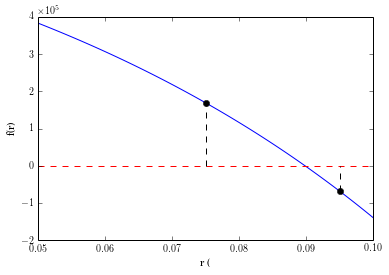

In [11]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.1, 100)
f = lambda r, A, m, P, n: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r, A, m, P, n), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')
axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

a = 0.075
b = 0.095
axes.plot(a, f(a, A, m, P, n), 'ko')
axes.plot([a, a], [0.0, f(a, A, m, P, n)], 'k--')
axes.plot(b, f(b, A, m, P, n), 'ko')
axes.plot([b, b], [f(b, A, m, P, n), 0.0], 'k--')

plt.show()

### Bisection Algorithm

Given a bracket $[a,b]$ and a function $f(x)$ - 
1. Initialize with bracket
2. Iterate
   1. Cut bracket in half and check to see where the zero is
   2. Set bracket to new bracket based on what direction we went

Success!
  x* = 0.0898560248408
  f(x*) = -7.79697438702e-05
  number of steps = 29


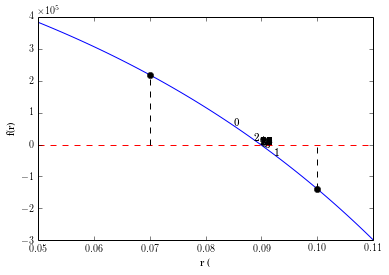

In [12]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)

# Initialize bracket
a = 0.07
b = 0.10

# Setup figure to plot convergence
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r, A, m, P, n), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')
axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
# axes.set_xlim([0.085, 0.091])
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axes.plot(a, f(a, A, m, P, n), 'ko')
axes.plot([a, a], [0.0, f(a, A, m, P, n)], 'k--')
axes.plot(b, f(b, A, m, P, n), 'ko')
axes.plot([b, b], [f(b, A, m, P, n), 0.0], 'k--')

# Algorithm parameters
TOLERANCE = 1e-4
MAX_STEPS = 100

# Initialize loop
f_a = f(a)
f_b = f(b)
delta_x = b - a

# Loop until we reach the TOLERANCE or we take MAX_STEPS
for step in xrange(MAX_STEPS):
    c = a + delta_x / 2.0
    f_c = f(c)
    if numpy.sign(f_a) != numpy.sign(f_c):
        b = c
        f_b = f_c
    else:
        a = c
        f_a = f_c
    delta_x = b - a
    
    # Plot iteration
    axes.text(c, f(c), str(step))
    
    # Check tolerance - Could also check the size of delta_x
    if numpy.abs(f_c) < TOLERANCE:
        break
        
if step == MAX_STEPS:
    print "Reached maximum number of steps!"
else:
    print "Success!"
    print "  x* = %s" % c
    print "  f(x*) = %s" % f(c)
    print "  number of steps = %s" % step

#### Convergence of Bisection

$$|e_{k+1}| = C |e_k|^n$$

$$e_k \approx \Delta x_k$$

$$e_{k+1} \approx \frac{1}{2} \Delta x_k$$

$$|e_{k+1}| = \frac{1}{2} |e_k|$$

$\Rightarrow$ Linear convergence

### Newton's Method (Newton-Raphson)
 - Given a bracket, bisection is guaranteed to converge linearly to a root
 - However bisection uses almost no information about $f(x)$ beyond its sign at a point
 
**Basic Idea**: Given $f(x)$ and $f'(x)$ use a linear approximation to $f(x)$ "locally" and use x-intercept of the resulting line to predict where $x^*$ might be.

Given current location $x_k$, we have $f(x_k)$ and $f'(x_k)$ and form a line through the point $(x_k, f(x_k))$:

Form equation for the line:

$$y = f'(x_k) x + b$$

Solve for the y-intercept value $b$

$$f(x_k) = f'(x_k) x_k + b$$

$$b = f(x_k) - f'(x_k) x_k$$

and simplify.

$$y = f'(x_k) x + f(x_k) - f'(x_k) x_k$$

$$y = f'(x_k) (x - x_k) + f(x_k)$$

Now find the intersection of our line and the x-axis (i.e. when $y = 0$) and use the resulting value of $x$ to set $x_{k+1}$ 
$$0 = f'(x_k) (x_{k+1}-x_k) + f(x_k)$$

$$x_{k+1} = x_k-\frac{f(x_k)}{f'(x_k)}$$

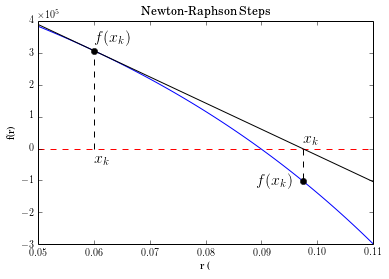

In [13]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
f_prime = lambda r, A=A, m=m, P=P, n=n: \
            -P*m*n*(1.0 + r/m)**(m*n)/(r*(1.0 + r/m)) \
                + P*m*((1.0 + r/m)**(m*n) - 1.0)/r**2

# Algorithm parameters
MAX_STEPS = 100
TOLERANCE = 1e-4
        
# Initial guess
x_k = 0.06

# Setup figure to plot convergence
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

# Plot x_k point
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x_k, f(x_k), 'ko')
axes.text(x_k, -5e4, "$x_k$", fontsize=16)
axes.text(x_k, f(x_k) + 2e4, "$f(x_k)$", fontsize=16)
axes.plot(r, f_prime(x_k) * (r - x_k) + f(x_k), 'k')

# Plot x_{k+1} point
x_k = x_k - f(x_k) / f_prime(x_k)
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x_k, f(x_k), 'ko')
axes.text(x_k, 1e4, "$x_k$", fontsize=16)
axes.text(0.089, f(x_k) - 2e4, "$f(x_k)$", fontsize=16)

axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.set_title("Newton-Raphson Steps")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

plt.show()

### Algorithm

1. Initialize $x_k$
1. Begin loop and calculate what $x_{k+1}$
1. Check stopping criteria

Success!
  x* = 0.0898560248347
  f(x*) = 5.12227416039e-09
  number of steps = 5


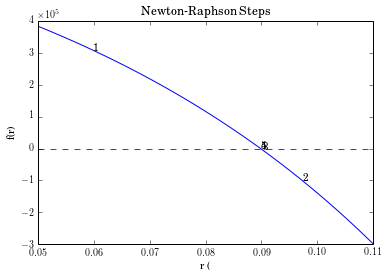

In [14]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
f_prime = lambda r, A=A, m=m, P=P, n=n: \
            -P*m*n*(1.0 + r/m)**(m*n)/(r*(1.0 + r/m)) \
                + P*m*((1.0 + r/m)**(m*n) - 1.0)/r**2

# Algorithm parameters
MAX_STEPS = 100
TOLERANCE = 1e-4
        
# Initial guess
x_k = 0.06

# Setup figure to plot convergence
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

for n in xrange(1, MAX_STEPS + 1):
    axes.text(x_k, f(x_k), str(n))
    x_k = x_k - f(x_k) / f_prime(x_k)
    if numpy.abs(f(x_k)) < TOLERANCE:
        break
        
if n == MAX_STEPS:
    print "Reached maximum number of steps!"
else:
    print "Success!"
    print "  x* = %s" % x_k
    print "  f(x*) = %s" % f(x_k)
    print "  number of steps = %s" % n

axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.set_title("Newton-Raphson Steps")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

plt.show()

### Example:

$$f(x) = x - e^{-x}$$

$$f'(x) = 1 + e^{-x}$$

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} = x_k - \frac{x_k - e^{-x_k}}{1 + e^{-x_k}}$$


### Asymptotic Convergence of Newton's Method

For a simple root (non-multiplicative) - Let $g(x) = x - \frac{f(x)}{f'(x)}$, then

$$x_{k+1} = g(x_k)$$

Definitions of errors and iteration:

$$x_{k+1} = x^* + e_{k+1} ~~~~~ x_k = x^* + e_k$$

General Taylor expansion:

$$x^* + e_{k+1} = g(x^* + e_k) = g(x^*) + g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2!} + \ldots$$

Note that as before $x^*$ and $g(x^*)$ cancel:

$$e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2!} + \ldots$$

What about $g'(x^*)$ though:

$$g'(x) = 1 - \frac{f'(x)}{f'(x)} + \frac{f(x)f''(x)}{f'(x)^2}$$

which simplifies when evaluated at $x = x^*$ to

$$g'(x^*) = \frac{f(x^*)f''(x^*)}{f'(x^*)^2} = 0$$

The expansion then simplifies to 

$$e_{k+1} = \frac{g''(x^*) e_k^2}{2!} + \ldots$$

leading to the conclusion that 

$$|e_{k+1}| = \left | \frac{g''(x^*)}{2!} \right | |e_k|^2$$

Newton's method is therefore quadratically convergent where the the constant is controlled by the second derivative.

For a multiple root (e.g. $f(x) = (x-1)^2$) the case is not particularly rosey unfortunately.

### Example:
$f(x) = \sin (2 \pi x)$

$$x_{k+1} = x_k - \frac{\sin (2 \pi x)}{2 \pi \cos (2 \pi x)}= x_k - \frac{1}{2 \pi} \tan (2 \pi x)$$

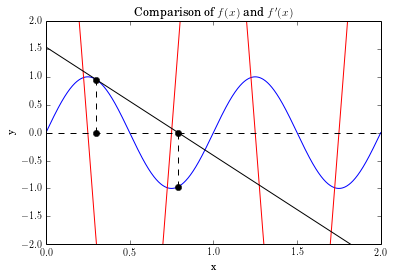

In [15]:
x = numpy.linspace(0, 2, 1000)
f = lambda x: numpy.sin(2.0 * numpy.pi * x)
f_prime = lambda x: 2.0 * numpy.pi * numpy.cos(2.0 * numpy.pi * x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x),'b')
axes.plot(x, f_prime(x), 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("Comparison of $f(x)$ and $f'(x)$")
axes.set_ylim((-2,2))
axes.set_xlim((0,2))
axes.plot(x, numpy.zeros(x.shape), 'k--')

x_k = 0.3
axes.plot([x_k, x_k], [0.0, f(x_k)], 'ko')
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x, f_prime(x_k) * (x - x_k) + f(x_k), 'k')


x_k = x_k - f(x_k) / f_prime(x_k)
axes.plot([x_k, x_k], [0.0, f(x_k)], 'ko')
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')

plt.show()

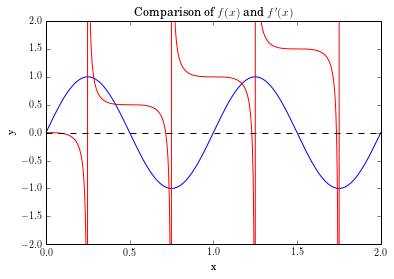

In [16]:
x = numpy.linspace(0, 2, 1000)
f = lambda x: numpy.sin(2.0 * numpy.pi * x)
x_kp = lambda x: x - 1.0 / (2.0 * numpy.pi) * numpy.tan(2.0 * numpy.pi * x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x),'b')
axes.plot(x, x_kp(x), 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("Comparison of $f(x)$ and $f'(x)$")
axes.set_ylim((-2,2))
axes.set_xlim((0,2))
axes.plot(x, numpy.zeros(x.shape), 'k--')

plt.show()

#### Other Issues

Need to supply both $f(x)$ and $f'(x)$, could be expensive
 
Example:  FTV equation $f(r) = A - \frac{m P}{r} \left[ \left(1 + \frac{r}{m} \right )^{m n} - 1\right]$

Can use symbolic differentiation (`sympy`)

### Secant Methods

Is there a method with the convergence of Newton's method but without the extra derivatives?  Maybe something that calculates the derivative rather than expects it?

Given $x_k$ and $x_{k-1}$ represent the derivative as

$$f'(x) \approx \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$$

Combining this with the basic approach of Newton leads to

$$x_{k+1} = x_k - \frac{f(x_k) (x_k - x_{k-1}) }{f(x_k) - f(x_{k-1})}$$

This leads to superlinear convergence (the exponent on the convergence is $\approx 1.7$)

Alternative interpretation, fit a line through two points and see where they intersect the x-axis.

$$(x_k, f(x_k)) ~~~~~ (x_{k-1}, f(x_{k-1})$$

$$y = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x - x_k) + b$$

$$b = f(x_{k-1}) - \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x_{k-1} - x_k)$$

$$ y = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x - x_k) + f(x_k)$$

Now solve for $x_{k+1}$ which is where the line intersects the x-axies ($y=0$)

$$0 = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x_{k+1} - x_k) + f(x_k)$$

$$x_{k+1} = x_k - \frac{f(x_k)  (x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}$$

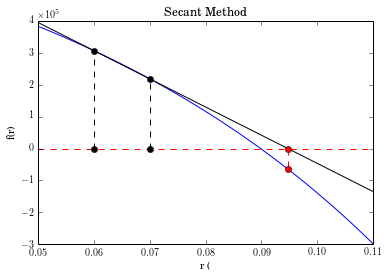

In [17]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)

# Initial guess
x_k = 0.07
x_km = 0.06

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

axes.plot(x_k, 0.0, 'ko')
axes.plot(x_k, f(x_k), 'ko')
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x_km, 0.0, 'ko')
axes.plot(x_km, f(x_km), 'ko')
axes.plot([x_km, x_km], [0.0, f(x_km)], 'k--')

axes.plot(r, (f(x_k) - f(x_km)) / (x_k - x_km) * (r - x_k) + f(x_k), 'k')
x_kp = x_k - (f(x_k) * (x_k - x_km) / (f(x_k) - f(x_km)))
axes.plot(x_kp, 0.0, 'ro')
axes.plot([x_kp, x_kp], [0.0, f(x_kp)], 'r--')
axes.plot(x_kp, f(x_kp), 'ro')

axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.set_title("Secant Method")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

plt.show()

#### Algorithm

Given $f(x)$, given bracket $[a,b]$, a `TOLERANCE`, and a `MAX_STEPS`

1. Initialize $x_1 = a$, $x_2 = b$, $f_1 = f(x_1)$, and $f_2 = f(x_2)$
2. Loop until either `MAX_STEPS` is reached or `TOLERANCE` is achieved
   1. Calculate new update $x_{k+1}$
   2. Check for convergence and break if reached
   3. Update parameters $x_1$, $x_2$, $f_1 = f(x_1)$ and $f_2(x_2)$
3. Celebrate

Success!
  x* = 0.0898560248347
  f(x*) = 9.66247171164e-09
  number of steps = 6


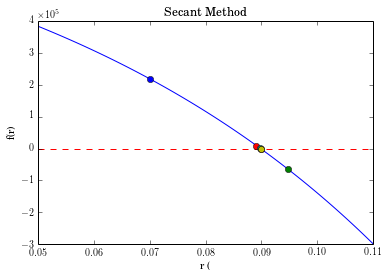

In [18]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
f_prime = lambda r, A=A, m=m, P=P, n=n: \
            -P*m*n*(1.0 + r/m)**(m*n)/(r*(1.0 + r/m)) \
                + P*m*((1.0 + r/m)**(m*n) - 1.0)/r**2

# Algorithm parameters
MAX_STEPS = 100
TOLERANCE = 1e-4
        
# Initial guess
x_k = 0.07
x_km = 0.06

# Setup figure to plot convergence
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

for n in xrange(1, MAX_STEPS + 1):
    axes.plot(x_k, f(x_k), 'o')
    x_kp = x_k - f(x_k) * (x_k - x_km) / (f(x_k) - f(x_km))
    x_km = x_k
    x_k = x_kp
    if numpy.abs(f(x_k)) < TOLERANCE:
        break
        
if n == MAX_STEPS:
    print "Reached maximum number of steps!"
else:
    print "Success!"
    print "  x* = %s" % x_k
    print "  f(x*) = %s" % f(x_k)
    print "  number of steps = %s" % n

axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.set_title("Secant Method")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

plt.show()

#### Comments

 - Secant method as shown is equivalent to linear interpolation
 - Can use higher order interpolation for higher order secant methods
 - Convergence is not quite quadratic
 - Not gauranteed to converge
 - Do not preserve brackets
 - Almost as good as Newton's method if your initial guess is good.

### Hybrid Methods

Combine attributes of methods with others to make one great algorithm to rule them all (not really)

#### Goals
1. Robustness:  Given a bracket $[a,b]$, maintain bracket
1. Efficiency:  Use superlinear convergent methods when possible

#### Options
 - Methods requiring $f'(x)$
   - NewtSafe (RootSafe, Numerical Recipes)
   - Newton's Method within a bracket, Bisection otherwise
 - Methods not requiring $f'(x)$
   - Brent's Algorithm (zbrent, Numerical Recipes)
     - Combination of bisection, secant and inverse quadratic interpolation
   - `scipy.optimize` package

## Optimization (finding extrema)

I want to find the extrema of a function $f(x)$ on a given interval $[a,b]$.

A few approaches:
 - Bracketing Algorithms:  Golden-Section Search (linear)
 - Interpolation Alogithms: Repeated parabolic interpolation
 - Hybrid Algorithms 

### Bracketing Algorithm (Golden Section Search)

Given $f(x) \in C[a,b]$ that is convex over an interval $x \in [a,b]$ reduce the interval size until it brackets the minimum.

Note that we no longer have the $x=0$ help we had before so bracketing and doing bisection is a bit more tricky in this case.  In particular choosing your initial bracket is important!



#### Golden Section Search - Picking Intervals
We also may want to choose the search points $c$ and $d$ so that the distance between $a$ and $d$, say $\Delta_{ad}$, and $b$ and $c$, say $\Delta_{bc}$, is carefully choosen.  For Golden Section Search we require that these are equal.  This tells use where to put $d$ but not $c$.  The Golden Section Search also requires that $b$ should be choosen so that the spacing between the points have the same porportion as $(a, c, d)$ and $(c, d, b)$.

Ok, that's weird.  Also, why are we calling this thing "Golden"?

Mathematically:

If $f(d) > f(c)$ then 

$$\frac{\Delta_{cd}}{\Delta_{ca}} = \frac{\Delta_{ca}}{\Delta_{bc}}$$

If $f(d) < f(c)$ then

$$\frac{\Delta_{cd}}{\Delta_{bc} - \Delta_{cd}} = \frac{\Delta_{ca}}{\Delta_{bc}}$$

Eliminating $\Delta_{cd}$ leads to the equation

$$\left( \frac{\Delta_cb}{\Delta_{ca}} \right )^2 = \frac{\Delta_cb}{\Delta_{ca}} + 1$$

Solving this leads to

$$ \frac{\Delta_cb}{\Delta_{ca}} = \varphi$$

where $\varphi$ is the golden ratio!

$$\varphi = \frac{1 \pm \sqrt{5}}{2}$$

#### Algorithm
1. Initialize bracket $[a,b]$ and compute $f_a = f(a)$ and $f_b = f(b)$, $\Delta x = b-a$
1. Initialize points $c = b - \varphi * (b - a)$ and $d = a + \varphi * (b -a)$
1. Loop
   1. Evaluate $f_c$ and $f_d$
   1. If $f_c < f_d$ then we pick the left interval for the next iteration
   1. and otherwise pick the right interval
   1. Check size of bracket for convergence $\Delta_{cd} <$ `TOLERANCE`

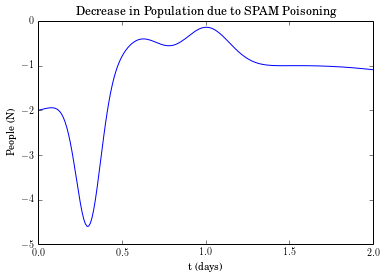

In [19]:
# New Test Function!
def f(t):
    """Simple function for minimization demos"""
    return -3.0 * numpy.exp(-(t - 0.3)**2 / (0.1)**2) \
           +      numpy.exp(-(t - 0.6)**2 / (0.2)**2) \
           +      numpy.exp(-(t - 1.0)**2 / (0.2)**2) \
           +      numpy.sin(t)                        \
           -      2.0

t = numpy.linspace(0, 2, 200)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t))
axes.set_xlabel("t (days)")
axes.set_ylabel("People (N)")
axes.set_title("Decrease in Population due to SPAM Poisoning")

plt.show()

Success!
  t* = 0.295881989254
  f(t*) = -4.60428544015
  number of steps = 17


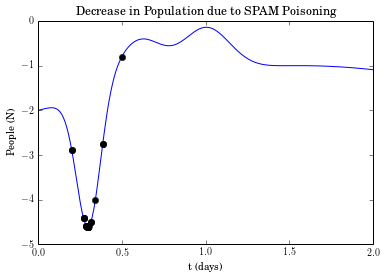

In [20]:
phi = (numpy.sqrt(5.0) - 1.0) / 2.0

TOLERANCE = 1e-4
MAX_STEPS = 100

a = 0.2
b = 0.5
c = b - phi * (b - a)
d = a + phi * (b - a)

t = numpy.linspace(0, 2, 200)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t))
axes.set_xlabel("t (days)")
axes.set_ylabel("People (N)")
axes.set_title("Decrease in Population due to SPAM Poisoning")

success = False
for n in xrange(1, MAX_STEPS + 1):
    axes.plot(a, f(a),'ko')
    axes.plot(b, f(b),'ko')
    fc = f(c)
    fd = f(d)
    
    if fc < fd:
        b = d
        d = c
        c = b - phi * (b - a)
    else:
        a = c
        c = d
        d = a + phi * (b - a)
        
    if numpy.abs(b - a) < TOLERANCE:
        success = True
        break
        
if success:
    print "Success!"
    print "  t* = %s" % str((b + a) / 2.0)
    print "  f(t*) = %s" % f((b + a) / 2.0)
    print "  number of steps = %s" % n
else:
    print "Reached maximum number of steps!"
    
plt.show()

### Interpolation Approach

Successive parabolic interpolation - similar to secant method

Basic idea:  Fit polynomial to function using three points, find it's minima, and guess new points based on that minima

#### Algorithm

Given $f(x)$ and $[a,b]$
1. Initialize $x = [a, b, (a+b)/2]$
1. Loop
   1. Evaluate function $f(x)$
   1. Use a polynomial fit to the function: 
   
      $$p(x) = p_0 x^2 + p_1 x + p_2$$

   1. Calculate the minimum: 
      
      $$p'(x) = 2 p_0 x + b = 0 ~~~~ \Rightarrow ~~~~ x = -b / (2 p_0)$$

   1. Calculate new interval
   1. Check tolerance

Success!
  t* = 0.295888307312
  f(t*) = -4.6042854524
  number of steps = 6


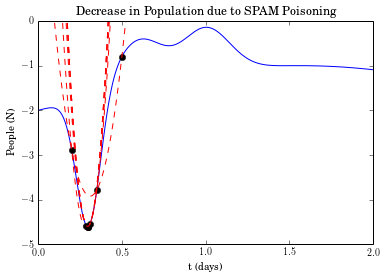

In [21]:
MAX_STEPS = 100
TOLERANCE = 1e-4

a = 0.5
b = 0.2
x = numpy.array([a, b, (a + b) / 2.0])

t = numpy.linspace(0, 2, 200)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t))
axes.set_xlabel("t (days)")
axes.set_ylabel("People (N)")
axes.set_title("Decrease in Population due to SPAM Poisoning")
axes.plot(x[0], f(x[0]), 'ko')
axes.plot(x[1], f(x[1]), 'ko')

success = False
for n in xrange(1, MAX_STEPS + 1):
    axes.plot(x[2], f(x[2]), 'ko')
    poly = numpy.polyfit(x, f(x), 2)
    axes.plot(t, poly[0] * t**2 + poly[1] * t + poly[2], 'r--')
    x[0] = x[1]
    x[1] = x[2]
    x[2] = -poly[1] / (2.0 * poly[0])
    if numpy.abs(x[2] - x[1]) / numpy.abs(x[2]) < TOLERANCE:
        success = True
        break
    
if success:
    print "Success!"
    print "  t* = %s" % x[2]
    print "  f(t*) = %s" % f(x[2])
    print "  number of steps = %s" % n
else:
    print "Reached maximum number of steps!"
    
axes.set_ylim((-5, 0.0))
plt.show()

## Scipy Optimization

Scipy contains a lot of ways for optimization!

In [22]:
import scipy.optimize as optimize
optimize.golden(f, brack=(0.2, 0.25, 0.5))

0.29588830308853215